# **SECTION A: Collect landmarks**
*collect landmarks (will download dataset from Kaggle and save CSVs of landmarks)*

In [54]:
import os
import cv2
import csv
import zipfile
import mediapipe as mp
from kaggle.api.kaggle_api_extended import KaggleApi
from tqdm import tqdm

**Kaggle Dataset Settings**

In [55]:

RAW_DIR = "asl_alphabet_train/asl_alphabet_train"
OUTPUT_DIR = "data/landmarks"

**Step 1: Download Dataset**

In [53]:
from google.colab import files
files.upload()   # Upload the kaggle.json file

# 2. Put it in the right place, set permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 3. Download the public dataset (replace with whatever you pick)
!kaggle datasets download -d grassknoted/asl-alphabet

# 4. Unzip it
!unzip asl-alphabet.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: dataset/asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: dataset/asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: dataset/asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: dataset/asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: dataset/asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: dataset/asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: dataset/asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: dataset/asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: dataset/asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: dataset/asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: data

**Step 2: Extract Landmarks**

In [56]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)

def extract_landmarks(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)
    if results.multi_hand_landmarks:
        lm = results.multi_hand_landmarks[0]
        return [coord for point in lm.landmark for coord in (point.x, point.y, point.z)]
    return None

def process_dataset():
    for label in os.listdir(RAW_DIR):
        label_path = os.path.join(RAW_DIR, label)
        if not os.path.isdir(label_path):
            continue

        out_file = os.path.join(OUTPUT_DIR, f"{label}.csv")
        with open(out_file, "w", newline="") as f:
            writer = csv.writer(f)

            for img_name in tqdm(os.listdir(label_path), desc=f"Processing {label}"):
                img_path = os.path.join(label_path, img_name)
                img = cv2.imread(img_path)
                if img is None:
                    continue

                landmarks = extract_landmarks(img)
                if landmarks:
                    writer.writerow(landmarks)

        print(f"✅ Saved landmarks for {label} → {out_file}")

In [59]:

process_dataset()

Processing H: 100%|██████████| 3000/3000 [01:21<00:00, 36.67it/s]


✅ Saved landmarks for H → data/landmarks/H.csv


Processing R: 100%|██████████| 3000/3000 [01:24<00:00, 35.49it/s]


✅ Saved landmarks for R → data/landmarks/R.csv


Processing A: 100%|██████████| 3000/3000 [01:19<00:00, 37.72it/s]


✅ Saved landmarks for A → data/landmarks/A.csv


Processing Q: 100%|██████████| 3000/3000 [01:17<00:00, 38.46it/s]


✅ Saved landmarks for Q → data/landmarks/Q.csv


Processing K: 100%|██████████| 3000/3000 [01:24<00:00, 35.49it/s]


✅ Saved landmarks for K → data/landmarks/K.csv


Processing S: 100%|██████████| 3000/3000 [01:21<00:00, 36.87it/s]


✅ Saved landmarks for S → data/landmarks/S.csv


Processing I: 100%|██████████| 3000/3000 [01:21<00:00, 36.96it/s]


✅ Saved landmarks for I → data/landmarks/I.csv


Processing E: 100%|██████████| 3000/3000 [01:21<00:00, 36.79it/s]


✅ Saved landmarks for E → data/landmarks/E.csv


Processing del: 100%|██████████| 3000/3000 [01:15<00:00, 39.86it/s]


✅ Saved landmarks for del → data/landmarks/del.csv


Processing U: 100%|██████████| 3000/3000 [01:24<00:00, 35.38it/s]


✅ Saved landmarks for U → data/landmarks/U.csv


Processing O: 100%|██████████| 3000/3000 [01:20<00:00, 37.46it/s]


✅ Saved landmarks for O → data/landmarks/O.csv


Processing nothing: 100%|██████████| 3000/3000 [00:53<00:00, 56.53it/s]


✅ Saved landmarks for nothing → data/landmarks/nothing.csv


Processing space: 100%|██████████| 3000/3000 [01:14<00:00, 40.17it/s]


✅ Saved landmarks for space → data/landmarks/space.csv


Processing V: 100%|██████████| 3000/3000 [01:22<00:00, 36.19it/s]


✅ Saved landmarks for V → data/landmarks/V.csv


Processing M: 100%|██████████| 3000/3000 [01:13<00:00, 40.80it/s]


✅ Saved landmarks for M → data/landmarks/M.csv


Processing Z: 100%|██████████| 3000/3000 [01:21<00:00, 36.89it/s]


✅ Saved landmarks for Z → data/landmarks/Z.csv


Processing Y: 100%|██████████| 3000/3000 [01:24<00:00, 35.62it/s]


✅ Saved landmarks for Y → data/landmarks/Y.csv


Processing J: 100%|██████████| 3000/3000 [01:24<00:00, 35.54it/s]


✅ Saved landmarks for J → data/landmarks/J.csv


Processing L: 100%|██████████| 3000/3000 [01:21<00:00, 36.86it/s]


✅ Saved landmarks for L → data/landmarks/L.csv


Processing B: 100%|██████████| 3000/3000 [01:20<00:00, 37.14it/s]


✅ Saved landmarks for B → data/landmarks/B.csv


Processing T: 100%|██████████| 3000/3000 [01:21<00:00, 36.80it/s]


✅ Saved landmarks for T → data/landmarks/T.csv


Processing N: 100%|██████████| 3000/3000 [01:09<00:00, 43.40it/s]


✅ Saved landmarks for N → data/landmarks/N.csv


Processing F: 100%|██████████| 3000/3000 [01:25<00:00, 35.19it/s]


✅ Saved landmarks for F → data/landmarks/F.csv


Processing W: 100%|██████████| 3000/3000 [01:22<00:00, 36.25it/s]


✅ Saved landmarks for W → data/landmarks/W.csv


Processing D: 100%|██████████| 3000/3000 [01:21<00:00, 36.76it/s]


✅ Saved landmarks for D → data/landmarks/D.csv


Processing G: 100%|██████████| 3000/3000 [01:22<00:00, 36.47it/s]


✅ Saved landmarks for G → data/landmarks/G.csv


Processing P: 100%|██████████| 3000/3000 [01:16<00:00, 39.31it/s]


✅ Saved landmarks for P → data/landmarks/P.csv


Processing C: 100%|██████████| 3000/3000 [01:16<00:00, 39.37it/s]


✅ Saved landmarks for C → data/landmarks/C.csv


Processing X: 100%|██████████| 3000/3000 [01:19<00:00, 37.66it/s]

✅ Saved landmarks for X → data/landmarks/X.csv


# **SECTION B: Training script**
*train model (loads CSVs, builds and trains a Conv1D model)*

In [60]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, GlobalAveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import pickle

**CONFIG**

In [62]:
DATA_DIR = "landmarks"  # 👈 CHANGED TO MATCH collect_data.py
MODEL_DIR = "model"
os.makedirs(MODEL_DIR, exist_ok=True)

**step 1: DATA LOADING (WITH SHUFFLE)**

In [63]:
def load_data():
    X, y = [], []
    print("📂 Loading datasets...")
    for file in sorted(os.listdir(DATA_DIR)):
        if file.endswith(".csv"):
            label = file.split('.')[0]  # e.g., "A.csv" → "A"
            df = pd.read_csv(os.path.join(DATA_DIR, file), header=None)
            print(f"   → {label}: {len(df)} samples")
            for _, row in df.iterrows():
                X.append(row.values)
                y.append(label)

    X = np.array(X)
    y = np.array(y)

    # Shuffle together
    print("\n🔀 Shuffling dataset...")
    indices = np.arange(len(X))
    np.random.seed(42)
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]

    return X, y


*Load data*

In [64]:
X, y = load_data()
print(f"\n✅ Total samples: {len(X)} | Classes: {len(np.unique(y))} → {sorted(np.unique(y))}")

📂 Loading datasets...
   → A: 2187 samples
   → B: 2207 samples
   → C: 1988 samples
   → D: 2463 samples
   → E: 2308 samples
   → F: 2876 samples
   → G: 2440 samples
   → H: 2393 samples
   → I: 2384 samples
   → J: 2578 samples
   → K: 2700 samples
   → L: 2527 samples
   → M: 1565 samples
   → N: 1276 samples
   → O: 2265 samples
   → P: 2042 samples
   → Q: 2093 samples
   → R: 2541 samples
   → S: 2551 samples
   → T: 2349 samples
   → U: 2516 samples
   → V: 2548 samples
   → W: 2456 samples
   → X: 2158 samples
   → Y: 2585 samples
   → Z: 2351 samples

🔀 Shuffling dataset...

✅ Total samples: 60347 | Classes: 26 → ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


*Check per-class counts*

In [65]:
unique, counts = np.unique(y, return_counts=True)
class_counts = dict(zip(unique, counts))
print("\n📊 Class Distribution:")
for cls, cnt in sorted(class_counts.items()):
    print(f"  {cls}: {cnt:>5} samples")



📊 Class Distribution:
  A:  2187 samples
  B:  2207 samples
  C:  1988 samples
  D:  2463 samples
  E:  2308 samples
  F:  2876 samples
  G:  2440 samples
  H:  2393 samples
  I:  2384 samples
  J:  2578 samples
  K:  2700 samples
  L:  2527 samples
  M:  1565 samples
  N:  1276 samples
  O:  2265 samples
  P:  2042 samples
  Q:  2093 samples
  R:  2541 samples
  S:  2551 samples
  T:  2349 samples
  U:  2516 samples
  V:  2548 samples
  W:  2456 samples
  X:  2158 samples
  Y:  2585 samples
  Z:  2351 samples


*Encode labels*

In [66]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
num_classes = len(le.classes_)
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

*Compute class weights*

In [67]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weight_dict = dict(enumerate(class_weights))

 ✅ RESHAPE FOR Conv1D: (N, 63) → (N, 21, 3)

In [68]:
X = X.reshape(-1, 21, 3)
input_shape = X.shape[1:]  # (21, 3)
print(f"\n🔢 Input shape after reshaping: {input_shape}")


🔢 Input shape after reshaping: (21, 3)


*Train/Val Split (Stratified)*

In [69]:
print("\n✂️  Splitting into train/validation sets (stratified)...")
X_train, X_val, y_train, y_val = train_test_split(
    X, y_categorical,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)


✂️  Splitting into train/validation sets (stratified)...


*FEATURE SCALING*

In [70]:
scaler = StandardScaler()
# Reshape to 2D for scaler: (N, 21, 3) → (N, 63)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

X_train_flat = scaler.fit_transform(X_train_flat)
X_val_flat = scaler.transform(X_val_flat)

# Reshape back to 3D
X_train = X_train_flat.reshape(-1, 21, 3)
X_val = X_val_flat.reshape(-1, 21, 3)

# Save scaler
with open(os.path.join(MODEL_DIR, 'scaler.pkl'), 'wb') as f:
    pickle.dump(scaler, f)

# Sanity check
print("\n🔍 Sample of first 10 labels in:")
print("   Train:", le.inverse_transform(np.argmax(y_train[:10], axis=1)))
print("   Val:  ", le.inverse_transform(np.argmax(y_val[:10], axis=1)))

# Double-check class balance
train_dist = Counter(np.argmax(y_train, axis=1))
val_dist = Counter(np.argmax(y_val, axis=1))
print("\n🧮 Train set class counts (first 5):", dict(list(train_dist.items())[:5]))
print("🧮 Val set class counts (first 5):  ", dict(list(val_dist.items())[:5]))


🔍 Sample of first 10 labels in:
   Train: ['A' 'S' 'Z' 'M' 'B' 'Y' 'Y' 'U' 'S' 'G']
   Val:   ['X' 'B' 'O' 'X' 'O' 'G' 'Z' 'R' 'F' 'I']

🧮 Train set class counts (first 5): {0: 1750, 18: 2041, 25: 1881, 12: 1252, 1: 1766}
🧮 Val set class counts (first 5):   {23: 432, 1: 441, 14: 453, 6: 488, 25: 470}


**step 2: MODEL BUILDING — Conv1D Version**

In [71]:
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
    BatchNormalization(),
    Dropout(0.3),

    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Conv1D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    GlobalAveragePooling1D(),

    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

# Compile
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 19, 64)         │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 19, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 19, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 17, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 17, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 17, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 15, 64)         │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,858 (222.10 KB)

 Trainable params: 56,346 (220.10 KB)

 Non-trainable params: 512 (2.00 KB)

**step 3: CALLBACKS**

In [72]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

checkpoint = ModelCheckpoint(
    filepath=os.path.join(MODEL_DIR, 'best_asl_model.h5'),
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

callbacks = [early_stop, reduce_lr, checkpoint]


**step 4: TRAINING**

In [73]:
print("\n🚀 Starting Training...\n")

history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=64,
    validation_data=(X_val, y_val),
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)



🚀 Starting Training...

Epoch 1/150
755/755 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3280 - loss: 2.1996
Epoch 1: val_accuracy improved from -inf to 0.90978, saving model to model/best_asl_model.h5


755/755 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.3283 - loss: 2.1986 - val_accuracy: 0.9098 - val_loss: 0.3352 - learning_rate: 0.0010
Epoch 2/150
749/755 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8440 - loss: 0.4923
Epoch 2: val_accuracy improved from 0.90978 to 0.95418, saving model to model/best_asl_model.h5


755/755 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8442 - loss: 0.4917 - val_accuracy: 0.9542 - val_loss: 0.1555 - learning_rate: 0.0010
Epoch 3/150
745/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9104 - loss: 0.3005
Epoch 3: val_accuracy improved from 0.95418 to 0.96603, saving model to model/best_asl_model.h5


755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9105 - loss: 0.3003 - val_accuracy: 0.9660 - val_loss: 0.1099 - learning_rate: 0.0010
Epoch 4/150
749/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9290 - loss: 0.2441
Epoch 4: val_accuracy improved from 0.96603 to 0.97589, saving model to model/best_asl_model.h5


755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9290 - loss: 0.2440 - val_accuracy: 0.9759 - val_loss: 0.0920 - learning_rate: 0.0010
Epoch 5/150
744/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9376 - loss: 0.2102
Epoch 5: val_accuracy did not improve from 0.97589
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9376 - loss: 0.2101 - val_accuracy: 0.9753 - val_loss: 0.0795 - learning_rate: 0.0010
Epoch 6/150
747/755 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9479 - loss: 0.1821
Epoch 6: val_accuracy improved from 0.97589 to 0.97680, saving model to model/best_asl_model.h5


755/755 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9480 - loss: 0.1821 - val_accuracy: 0.9768 - val_loss: 0.0761 - learning_rate: 0.0010
Epoch 7/150
744/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9486 - loss: 0.1696
Epoch 7: val_accuracy improved from 0.97680 to 0.98045, saving model to model/best_asl_model.h5


755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9487 - loss: 0.1696 - val_accuracy: 0.9804 - val_loss: 0.0631 - learning_rate: 0.0010
Epoch 8/150
743/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9558 - loss: 0.1500
Epoch 8: val_accuracy improved from 0.98045 to 0.98194, saving model to model/best_asl_model.h5


755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9558 - loss: 0.1501 - val_accuracy: 0.9819 - val_loss: 0.0603 - learning_rate: 0.0010
Epoch 9/150
742/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9568 - loss: 0.1493
Epoch 9: val_accuracy improved from 0.98194 to 0.98351, saving model to model/best_asl_model.h5


755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9568 - loss: 0.1492 - val_accuracy: 0.9835 - val_loss: 0.0595 - learning_rate: 0.0010
Epoch 10/150
755/755 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9597 - loss: 0.1457
Epoch 10: val_accuracy did not improve from 0.98351
755/755 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9597 - loss: 0.1457 - val_accuracy: 0.9819 - val_loss: 0.0654 - learning_rate: 0.0010
Epoch 11/150
744/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9585 - loss: 0.1396
Epoch 11: val_accuracy improved from 0.98351 to 0.98583, saving model to model/best_asl_model.h5


755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9586 - loss: 0.1396 - val_accuracy: 0.9858 - val_loss: 0.0492 - learning_rate: 0.0010
Epoch 12/150
752/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9621 - loss: 0.1309
Epoch 12: val_accuracy did not improve from 0.98583
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9621 - loss: 0.1309 - val_accuracy: 0.9833 - val_loss: 0.0522 - learning_rate: 0.0010
Epoch 13/150
753/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9633 - loss: 0.1278
Epoch 13: val_accuracy improved from 0.98583 to 0.98699, saving model to model/best_asl_model.h5


755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9633 - loss: 0.1278 - val_accuracy: 0.9870 - val_loss: 0.0445 - learning_rate: 0.0010
Epoch 14/150
743/755 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9630 - loss: 0.1247
Epoch 14: val_accuracy did not improve from 0.98699
755/755 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9631 - loss: 0.1247 - val_accuracy: 0.9836 - val_loss: 0.0532 - learning_rate: 0.0010
Epoch 15/150
752/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9654 - loss: 0.1186
Epoch 15: val_accuracy did not improve from 0.98699
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9654 - loss: 0.1186 - val_accuracy: 0.9862 - val_loss: 0.0471 - learning_rate: 0.0010
Epoch 16/150
746/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9641 - loss: 0.1209
Epoch 16: val_accuracy did not improve from 0.98699
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9641 - loss: 0.1209 - val_accuracy: 0.9865 - val_loss: 0.0445 - learning_rate: 0.0010
Epoch 17/150
755

755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9679 - loss: 0.1130 - val_accuracy: 0.9879 - val_loss: 0.0397 - learning_rate: 0.0010
Epoch 20/150
745/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9686 - loss: 0.1126
Epoch 20: val_accuracy did not improve from 0.98790
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9686 - loss: 0.1126 - val_accuracy: 0.9869 - val_loss: 0.0445 - learning_rate: 0.0010
Epoch 21/150
750/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9688 - loss: 0.1071
Epoch 21: val_accuracy did not improve from 0.98790
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9688 - loss: 0.1071 - val_accuracy: 0.9872 - val_loss: 0.0406 - learning_rate: 0.0010
Epoch 22/150
745/755 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9704 - loss: 0.1045
Epoch 22: val_accuracy improved from 0.98790 to 0.98840, saving model to model/best_asl_model.h5


755/755 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9704 - loss: 0.1045 - val_accuracy: 0.9884 - val_loss: 0.0413 - learning_rate: 0.0010
Epoch 23/150
743/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9728 - loss: 0.0981
Epoch 23: val_accuracy did not improve from 0.98840
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9728 - loss: 0.0982 - val_accuracy: 0.9873 - val_loss: 0.0399 - learning_rate: 0.0010
Epoch 24/150
742/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9711 - loss: 0.1008
Epoch 24: val_accuracy did not improve from 0.98840
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9711 - loss: 0.1008 - val_accuracy: 0.9879 - val_loss: 0.0387 - learning_rate: 0.0010
Epoch 25/150
746/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9707 - loss: 0.1015
Epoch 25: val_accuracy did not improve from 0.98840
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9707 - loss: 0.1015 - val_accuracy: 0.9872 - val_loss: 0.0389 - learning_rate: 0.0010
Epoch 26/150
755

755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9714 - loss: 0.0977 - val_accuracy: 0.9891 - val_loss: 0.0370 - learning_rate: 0.0010
Epoch 28/150
750/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9724 - loss: 0.0937
Epoch 28: val_accuracy did not improve from 0.98906
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9724 - loss: 0.0937 - val_accuracy: 0.9883 - val_loss: 0.0395 - learning_rate: 0.0010
Epoch 29/150
744/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9732 - loss: 0.0931
Epoch 29: val_accuracy did not improve from 0.98906
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9732 - loss: 0.0931 - val_accuracy: 0.9868 - val_loss: 0.0452 - learning_rate: 0.0010
Epoch 30/150
751/755 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9747 - loss: 0.0901
Epoch 30: val_accuracy did not improve from 0.98906
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9747 - loss: 0.0901 - val_accuracy: 0.9886 - val_loss: 0.0375 - learning_rate: 0.0010
Epoch 31/150
745

755/755 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9748 - loss: 0.0851 - val_accuracy: 0.9901 - val_loss: 0.0329 - learning_rate: 0.0010
Epoch 35/150
753/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9750 - loss: 0.0863
Epoch 35: val_accuracy did not improve from 0.99006
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9750 - loss: 0.0863 - val_accuracy: 0.9881 - val_loss: 0.0370 - learning_rate: 0.0010
Epoch 36/150
755/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9756 - loss: 0.0891
Epoch 36: val_accuracy improved from 0.99006 to 0.99039, saving model to model/best_asl_model.h5


755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9756 - loss: 0.0891 - val_accuracy: 0.9904 - val_loss: 0.0330 - learning_rate: 0.0010
Epoch 37/150
746/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9752 - loss: 0.0846
Epoch 37: val_accuracy did not improve from 0.99039
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9751 - loss: 0.0846 - val_accuracy: 0.9892 - val_loss: 0.0326 - learning_rate: 0.0010
Epoch 38/150
748/755 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9757 - loss: 0.0829
Epoch 38: val_accuracy improved from 0.99039 to 0.99122, saving model to model/best_asl_model.h5


755/755 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9758 - loss: 0.0829 - val_accuracy: 0.9912 - val_loss: 0.0310 - learning_rate: 0.0010
Epoch 39/150
748/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9764 - loss: 0.0823
Epoch 39: val_accuracy did not improve from 0.99122
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9764 - loss: 0.0823 - val_accuracy: 0.9896 - val_loss: 0.0337 - learning_rate: 0.0010
Epoch 40/150
749/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9733 - loss: 0.0893
Epoch 40: val_accuracy did not improve from 0.99122
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9733 - loss: 0.0893 - val_accuracy: 0.9899 - val_loss: 0.0334 - learning_rate: 0.0010
Epoch 41/150
746/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9761 - loss: 0.0872
Epoch 41: val_accuracy did not improve from 0.99122
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9761 - loss: 0.0871 - val_accuracy: 0.9896 - val_loss: 0.0339 - learning_rate: 0.0010
Epoch 42/150
742

755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9761 - loss: 0.0809 - val_accuracy: 0.9918 - val_loss: 0.0290 - learning_rate: 0.0010
Epoch 52/150
743/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9780 - loss: 0.0750
Epoch 52: val_accuracy did not improve from 0.99180
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9780 - loss: 0.0749 - val_accuracy: 0.9914 - val_loss: 0.0300 - learning_rate: 0.0010
Epoch 53/150
755/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9783 - loss: 0.0747
Epoch 53: val_accuracy did not improve from 0.99180
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9783 - loss: 0.0747 - val_accuracy: 0.9906 - val_loss: 0.0309 - learning_rate: 0.0010
Epoch 54/150
748/755 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9784 - loss: 0.0722
Epoch 54: val_accuracy did not improve from 0.99180
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9784 - loss: 0.0722 - val_accuracy: 0.9916 - val_loss: 0.0289 - learning_rate: 0.0010
Epoch 55/150
752

755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9801 - loss: 0.0669 - val_accuracy: 0.9925 - val_loss: 0.0268 - learning_rate: 5.0000e-04
Epoch 58/150
745/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9821 - loss: 0.0636
Epoch 58: val_accuracy did not improve from 0.99254
755/755 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9821 - loss: 0.0636 - val_accuracy: 0.9920 - val_loss: 0.0275 - learning_rate: 5.0000e-04
Epoch 59/150
745/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9832 - loss: 0.0589
Epoch 59: val_accuracy improved from 0.99254 to 0.99279, saving model to model/best_asl_model.h5


755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9832 - loss: 0.0589 - val_accuracy: 0.9928 - val_loss: 0.0275 - learning_rate: 5.0000e-04
Epoch 60/150
739/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9827 - loss: 0.0620
Epoch 60: val_accuracy did not improve from 0.99279
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9827 - loss: 0.0621 - val_accuracy: 0.9911 - val_loss: 0.0300 - learning_rate: 5.0000e-04
Epoch 61/150
741/755 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9820 - loss: 0.0629
Epoch 61: val_accuracy did not improve from 0.99279
755/755 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9820 - loss: 0.0628 - val_accuracy: 0.9919 - val_loss: 0.0282 - learning_rate: 5.0000e-04
Epoch 62/150
740/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9830 - loss: 0.0595
Epoch 62: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 62: val_accuracy did not improve from 0.99279
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9830 - loss:

755/755 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9840 - loss: 0.0565 - val_accuracy: 0.9930 - val_loss: 0.0262 - learning_rate: 2.5000e-04
Epoch 66/150
740/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9853 - loss: 0.0511
Epoch 66: val_accuracy did not improve from 0.99296
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9853 - loss: 0.0511 - val_accuracy: 0.9928 - val_loss: 0.0265 - learning_rate: 2.5000e-04
Epoch 67/150
750/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9845 - loss: 0.0541
Epoch 67: val_accuracy did not improve from 0.99296
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9845 - loss: 0.0541 - val_accuracy: 0.9922 - val_loss: 0.0258 - learning_rate: 2.5000e-04
Epoch 68/150
744/755 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9850 - loss: 0.0504
Epoch 68: val_accuracy did not improve from 0.99296
755/755 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9850 - loss: 0.0504 - val_accuracy: 0.9928 - val_loss: 0.0245 - learning_rate: 2.5000e-04


755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9855 - loss: 0.0517 - val_accuracy: 0.9936 - val_loss: 0.0239 - learning_rate: 2.5000e-04
Epoch 71/150
755/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9849 - loss: 0.0535
Epoch 71: val_accuracy did not improve from 0.99362
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9849 - loss: 0.0535 - val_accuracy: 0.9930 - val_loss: 0.0249 - learning_rate: 2.5000e-04
Epoch 72/150
747/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9855 - loss: 0.0511
Epoch 72: val_accuracy did not improve from 0.99362
755/755 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9855 - loss: 0.0511 - val_accuracy: 0.9927 - val_loss: 0.0257 - learning_rate: 2.5000e-04
Epoch 73/150
755/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9851 - loss: 0.0537
Epoch 73: val_accuracy did not improve from 0.99362
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9851 - loss: 0.0537 - val_accuracy: 0.9930 - val_loss: 0.0245 - learning_rate: 2.5000e-04


755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9859 - loss: 0.0468 - val_accuracy: 0.9937 - val_loss: 0.0249 - learning_rate: 1.2500e-04
Epoch 80/150
751/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9858 - loss: 0.0501
Epoch 80: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 80: val_accuracy did not improve from 0.99370
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9858 - loss: 0.0501 - val_accuracy: 0.9929 - val_loss: 0.0258 - learning_rate: 1.2500e-04
Epoch 81/150
755/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9862 - loss: 0.0480
Epoch 81: val_accuracy did not improve from 0.99370
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9862 - loss: 0.0480 - val_accuracy: 0.9936 - val_loss: 0.0238 - learning_rate: 6.2500e-05
Epoch 82/150
744/755 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9858 - loss: 0.0470
Epoch 82: val_accuracy did not improve from 0.99370
755/755 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9858 - loss: 

755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9871 - loss: 0.0456 - val_accuracy: 0.9939 - val_loss: 0.0237 - learning_rate: 3.1250e-05
Epoch 92/150
754/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9887 - loss: 0.0398
Epoch 92: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 92: val_accuracy did not improve from 0.99387
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9887 - loss: 0.0399 - val_accuracy: 0.9937 - val_loss: 0.0237 - learning_rate: 3.1250e-05
Epoch 93/150
747/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0442
Epoch 93: val_accuracy did not improve from 0.99387
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9878 - loss: 0.0442 - val_accuracy: 0.9938 - val_loss: 0.0236 - learning_rate: 1.5625e-05
Epoch 94/150
751/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9872 - loss: 0.0431
Epoch 94: val_accuracy did not improve from 0.99387
755/755 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9872 - loss

755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9869 - loss: 0.0463 - val_accuracy: 0.9940 - val_loss: 0.0233 - learning_rate: 1.5625e-05
Epoch 103/150
747/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9875 - loss: 0.0420
Epoch 103: val_accuracy did not improve from 0.99395
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9876 - loss: 0.0420 - val_accuracy: 0.9935 - val_loss: 0.0236 - learning_rate: 1.5625e-05
Epoch 104/150
752/755 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9873 - loss: 0.0440
Epoch 104: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 104: val_accuracy did not improve from 0.99395
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9873 - loss: 0.0440 - val_accuracy: 0.9937 - val_loss: 0.0236 - learning_rate: 1.5625e-05
Epoch 105/150
745/755 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9877 - loss: 0.0417
Epoch 105: val_accuracy did not improve from 0.99395
755/755 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9877 

**step 5: SAVE ARTIFACTS**

In [74]:
print("\n💾 Saving final model and artifacts...")

model.save(os.path.join(MODEL_DIR, 'asl_model_final.h5'))
with open(os.path.join(MODEL_DIR, 'label_encoder.pkl'), 'wb') as f:
    pickle.dump(le, f)
with open(os.path.join(MODEL_DIR, 'training_history.pkl'), 'wb') as f:
    pickle.dump(history.history, f)



💾 Saving final model and artifacts...


**step 6: PLOTTING: LOSS & ACCURACY**


📈 Plotting training curves...


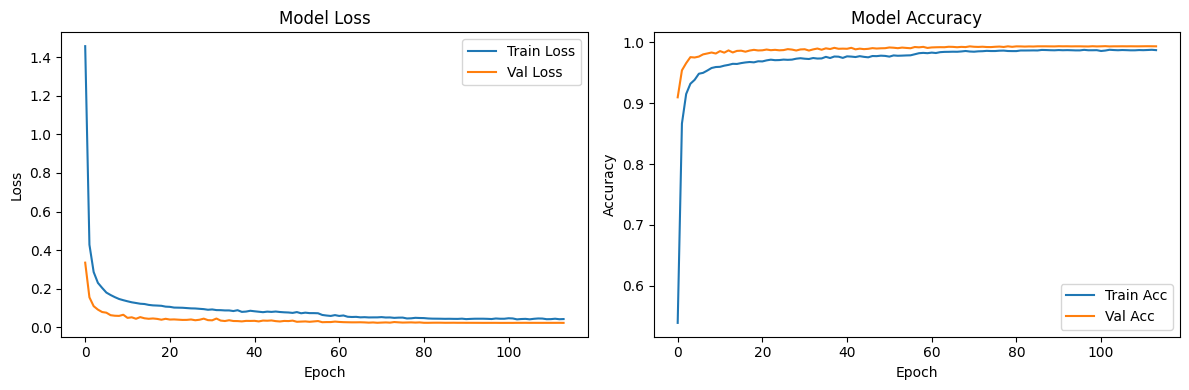

In [75]:
print("\n📈 Plotting training curves...")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(MODEL_DIR, 'training_curves.png'))
plt.show()


**step 7: CONFUSION MATRIX 🎯**


🧩 Generating Confusion Matrix...
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


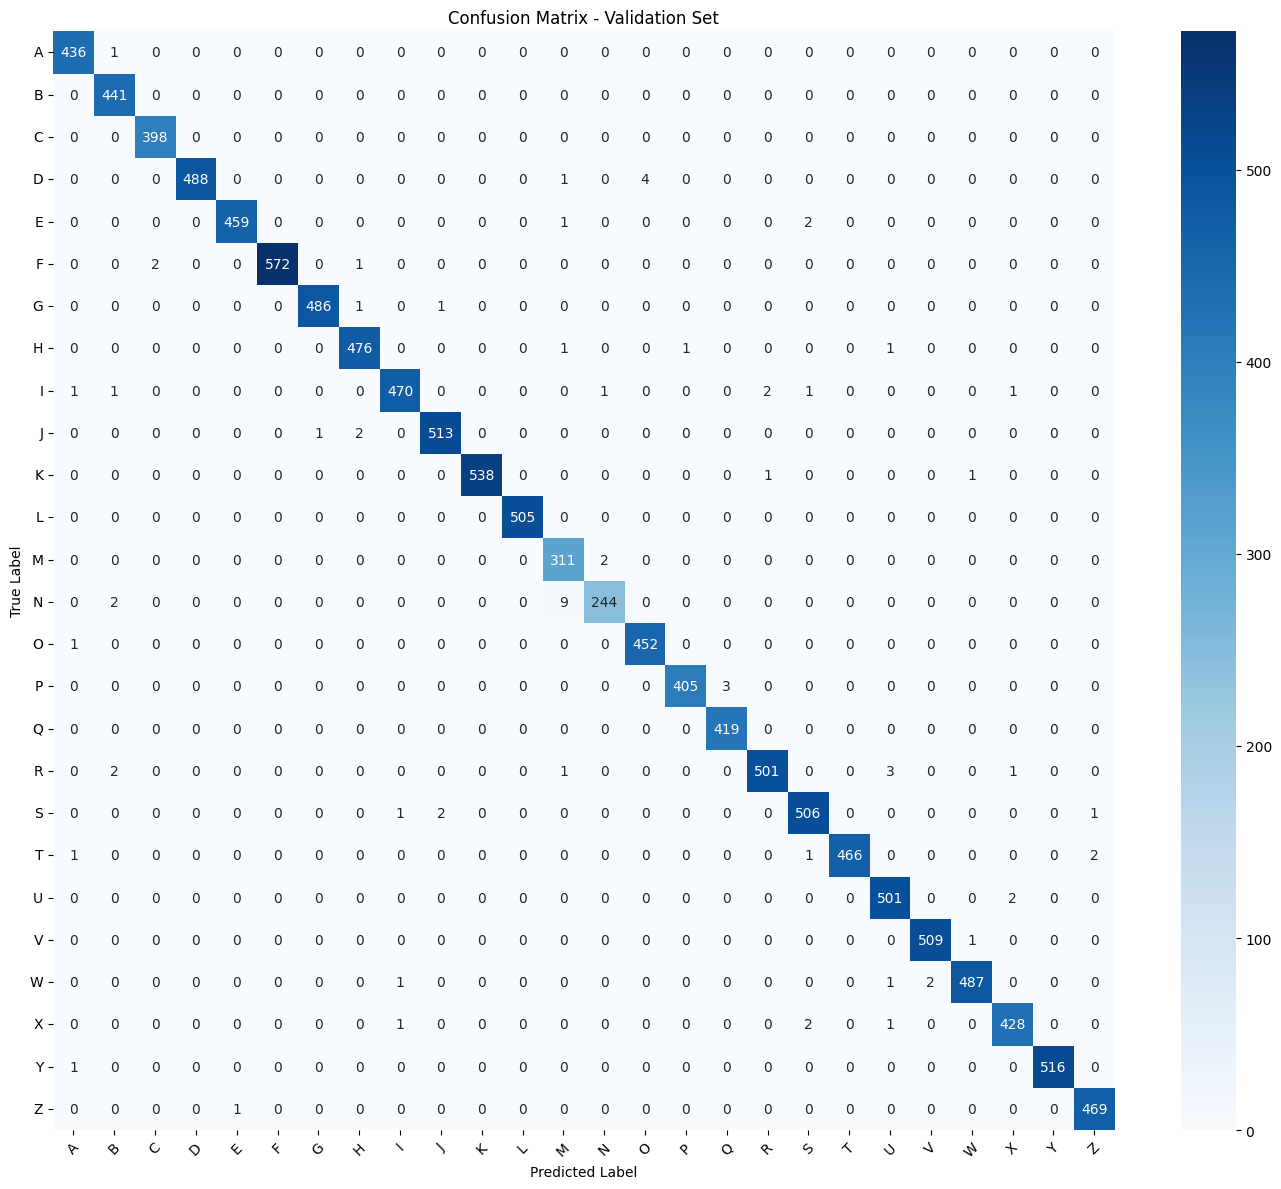

In [76]:
print("\n🧩 Generating Confusion Matrix...")

y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

cm = confusion_matrix(y_val_true_classes, y_val_pred_classes)

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(os.path.join(MODEL_DIR, 'confusion_matrix.png'), dpi=150)
plt.show()



*Classification report*

In [77]:
# Classification report
print("\n📋 Classification Report:")
print(classification_report(y_val_true_classes, y_val_pred_classes, target_names=le.classes_))

# Top confused pairs
print("\n🔝 Top 5 Most Confused Pairs (True → Predicted):")
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)
errors = []
for true_label in le.classes_:
    for pred_label in le.classes_:
        if true_label != pred_label and cm_df.loc[true_label, pred_label] > 0:
            errors.append((true_label, pred_label, cm_df.loc[true_label, pred_label]))

errors_sorted = sorted(errors, key=lambda x: x[2], reverse=True)[:5]
for true_lbl, pred_lbl, count in errors_sorted:
    print(f"   {true_lbl} → {pred_lbl}: {count} times")


📋 Classification Report:
              precision    recall  f1-score   support

           A       0.99      1.00      0.99       437
           B       0.99      1.00      0.99       441
           C       0.99      1.00      1.00       398
           D       1.00      0.99      0.99       493
           E       1.00      0.99      1.00       462
           F       1.00      0.99      1.00       575
           G       1.00      1.00      1.00       488
           H       0.99      0.99      0.99       479
           I       0.99      0.99      0.99       477
           J       0.99      0.99      0.99       516
           K       1.00      1.00      1.00       540
           L       1.00      1.00      1.00       505
           M       0.96      0.99      0.98       313
           N       0.99      0.96      0.97       255
           O       0.99      1.00      0.99       453
           P       1.00      0.99      1.00       408
           Q       0.99      1.00      1.00       419
 

**FINAL EVALUATION**

In [78]:
print("\n🧪 Evaluating on validation set...")
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
print(f"\n✅ Final Validation Accuracy: {val_acc:.4f} ({val_acc*100:.2f}%)")
print(f"✅ Final Validation Loss: {val_loss:.4f}")


🧪 Evaluating on validation set...

✅ Final Validation Accuracy: 0.9939 (99.39%)
✅ Final Validation Loss: 0.0233
